<a href="https://colab.research.google.com/github/darjuangeloys/LinearAlgebra2021/blob/main/Assignment4_DarJuan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Algebra for ECE**
## *Laboratory 4 : Matrices*

Now that you have a fundamental knowledge about Python, we'll try to look into greater dimensions.

### **Objectives**
At the end of this activity you will be able to:
1. Be familiar with matrices and their relation to linear equations.
2. Perform basic matrix operations.
3. Program and translate matrix equations and operations using Python.

# **Discussion**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
%matplotlib inline

## **Matrices**

The notation and use of matrices is probably one of the fundamentals of modern computing. Matrices are also handy representations of complex equations or multiple inter-related equations from 2-dimensional equations to even hundreds and thousands of them.

Let's say for example you have $A$ and $B$ as system of equation.

$$
A = \left\{
    \begin{array}\
        x + y \\ 
        4x - 10y
    \end{array}
\right. \\
B = \left\{
    \begin{array}\
        x+y+z \\ 
        3x -2y -z \\
        -x + 4y +2z
    \end{array}
\right. $$

We could see that $A$ is a system of 2 equations with 2 parameters. While $B$ is a system of 3 equations with 3 parameters. We can represent them as matrices as:

$$
A=\begin{bmatrix} 1 & 1 \\ 4 & {-10}\end{bmatrix} \\
B=\begin{bmatrix} 1 & 1 & 1 \\ 3 & -2 & -1 \\ -1 & 4 & 2\end{bmatrix}
$$

### ***Declaring Matrices***

Just like our previous laboratory activity, we'll represent system of linear equations as a matrix. The entities or numbers in matrices are called the elements of a matrix. These elements are arranged and ordered in rows and columns which form the list/array-like structure of matrices. And just like arrays, these elements are indexed according to their position with respect to their rows and columns. This can be reprsented just like the equation below. Whereas $A$ is a matrix consisting of elements denoted by $a_{i,j}$. Denoted by $i$ is the number of rows in the matrix while $j$ stands for the number of columns.<br>
Do note that the $size$ of a matrix is $i\times j$.

$$A=\begin{bmatrix}
a_{(0,0)}&a_{(0,1)}&\dots&a_{(0,j-1)}\\
a_{(1,0)}&a_{(1,1)}&\dots&a_{(1,j-1)}\\
\vdots&\vdots&\ddots&\vdots&\\
a_{(i-1,0)}&a_{(i-1,1)}&\dots&a_{(i-1,j-1)}
\end{bmatrix}
$$

We already gone over some of the types of matrices as vectors but we'll further discuss them in this laboratory activity. Since you already know how to describe vectors using <b>shape</b>, <b>dimensions</b> and <b>size</b> attributes, we'll use them to analyze these matrices.

In [ ]:
## Since we'll keep on describing matrices. Let's make a function.
def describe_mat(matrix):
    print(f'Matrix:\n{matrix}\n\nShape:\t{matrix.shape}\nRank:\t{matrix.ndim}\n')

In [ ]:
## Declaring a 2 x 2 matrix
A = np.array([
    [1, 2],
    [3, 1]
])
describe_mat(A)

Matrix:
[[1 2]
 [3 1]]

Shape:	(2, 2)
Rank:	2



In [ ]:
G = np.array([
    [1,1],
    [2,2]
])
describe_mat(G)

Matrix:
[[1 1]
 [2 2]]

Shape:	(2, 2)
Rank:	2



In [ ]:
## Declaring a 3 x 2 matrix
B = np.array([
    [8, 2],
    [5, 4],
    [1, 1]
])
describe_mat(B)

Matrix:
[[8 2]
 [5 4]
 [1 1]]

Shape:	(3, 2)
Rank:	2



In [ ]:
H = np.array([1,2,3,4,5])
describe_mat(H)

Matrix:
[1 2 3 4 5]

Shape:	(5,)
Rank:	1



## **Categorizing** **Matrices**

There are several ways of classifying matrices. Once could be according to their <b>shape</b> and another is according to their <b>element values</b>. We'll try to go through them.

### ***According to shape***

#### Row and Column Matrices

Row and column matrices are common in vector and matrix computations. They can also represent row and column spaces of a bigger vector space. Row and column matrices are represented by a single column or single row. So with that being, the shape of row matrices would be $1 \times j$ and column matrices would be $i \times 1$.

In [ ]:
## Declaring a Row Matrix

row_mat_1D = np.array([
    1, 3, 2
]) ## this is a 1-D Matrix with a shape of (3,), it's not really considered as a row matrix.
row_mat_2D = np.array([
    [1,2,3]
]) ## this is a 2-D Matrix with a shape of (1,3)
describe_mat(row_mat_1D)
describe_mat(row_mat_2D)

Matrix:
[1 3 2]

Shape:	(3,)
Rank:	1

Matrix:
[[1 2 3]]

Shape:	(1, 3)
Rank:	2



In [ ]:
## Declaring a Column Matrix

col_mat = np.array([
    [1],
    [2],
    [5]
]) ## this is a 2-D Matrix with a shape of (3,1)
describe_mat(col_mat)

Matrix:
[[1]
 [2]
 [5]]

Shape:	(3, 1)
Rank:	2



#### Square Matrices

Square matrices are matrices that have the same row and column sizes. We could say a matrix is square if $i = j$. We can tweak our matrix descriptor function to determine square matrices.

In [ ]:
def describe_mat(matrix):
    is_square = True if matrix.shape[0] == matrix.shape[1] else False 
    print(f'Matrix:\n{matrix}\n\nShape:\t{matrix.shape}\nRank:\t{matrix.ndim}\nIs Square: {is_square}\n')

In [ ]:
square_mat = np.array([
    [1,2,5],
    [3,3,8],
    [6,1,2]
])

non_square_mat = np.array([
    [1,2,5],
    [3,3,8]
])
describe_mat(square_mat)
describe_mat(non_square_mat)

Matrix:
[[1 2 5]
 [3 3 8]
 [6 1 2]]

Shape:	(3, 3)
Rank:	2
Is Square: True

Matrix:
[[1 2 5]
 [3 3 8]]

Shape:	(2, 3)
Rank:	2
Is Square: False



### ***According to element values***

#### *Null Matrix*

A Null Matrix is a matrix that has no elements. It is always a subspace of any vector or matrix.

In [ ]:
def describe_mat(matrix):
    if matrix.size > 0:
        is_square = True if matrix.shape[0] == matrix.shape[1] else False 
        print(f'Matrix:\n{matrix}\n\nShape:\t{matrix.shape}\nRank:\t{matrix.ndim}\nIs Square: {is_square}\n')
    else:
        print('Matrix is Null')

In [ ]:
null_mat = np.array([])
describe_mat(null_mat)

Matrix is Null


#### *Zero Matrix*

A zero matrix can be any rectangular matrix but with all elements having a value of 0.

In [ ]:
zero_mat_row = np.zeros((1,2))
zero_mat_sqr = np.zeros((2,2))
zero_mat_rct = np.zeros((3,2))

print(f'Zero Row Matrix: \n{zero_mat_row}')
print(f'Zero Square Matrix: \n{zero_mat_sqr}')
print(f'Zero Rectangular Matrix: \n{zero_mat_rct}')

Zero Row Matrix: 
[[0. 0.]]
Zero Square Matrix: 
[[0. 0.]
 [0. 0.]]
Zero Rectangular Matrix: 
[[0. 0.]
 [0. 0.]
 [0. 0.]]


#### *Ones Matrix*

A ones matrix, just like the zero matrix, can be any rectangular matrix but all of its elements are 1s instead of 0s.

In [ ]:
ones_mat_row = np.ones((1,2))
ones_mat_sqr = np.ones((2,2))
ones_mat_rct = np.ones((3,2))

print(f'Ones Row Matrix: \n{ones_mat_row}')
print(f'Ones Square Matrix: \n{ones_mat_sqr}')
print(f'Ones Rectangular Matrix: \n{ones_mat_rct}')

Ones Row Matrix: 
[[1. 1.]]
Ones Square Matrix: 
[[1. 1.]
 [1. 1.]]
Ones Rectangular Matrix: 
[[1. 1.]
 [1. 1.]
 [1. 1.]]


#### *Diagonal Matrix*

A diagonal matrix is a square matrix that has values only at the diagonal of the matrix. 

In [ ]:
np.array([
    [2,0,0],
    [0,3,0],
    [0,0,5]
])
# a[1,1], a[2,2], a[3,3], ... a[n-1,n-1]

array([[2, 0, 0],
       [0, 3, 0],
       [0, 0, 5]])

In [ ]:
d = np.diag([2,3,5,7])
d

array([[2, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 5, 0],
       [0, 0, 0, 7]])

#### *Identity Matrix*

An identity matrix is a special diagonal matrix in which the values at the diagonal are ones.

In [ ]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

#### *Upper Triangular Matrix*

An upper triangular matrix is a matrix that has no values below the diagonal. 

In [ ]:
np.array([
    [1,2,3],
    [0,3,1],
    [0,0,5]
])

array([[1, 2, 3],
       [0, 3, 1],
       [0, 0, 5]])

#### *Lower Triangular Matrix*

A lower triangular matrix is a matrix that has no values above the diagonal.

In [ ]:
np.array([
    [1,0,0],
    [5,3,0],
    [7,8,5]
])

array([[1, 0, 0],
       [5, 3, 0],
       [7, 8, 5]])

## **Matrix** **Algebra**

### **Addition**

In [ ]:
A = np.array([
    [1,2],
    [2,3],
    [4,1]
])
B = np.array([
    [2,2],
    [0,0],
    [1,1]
])
A+B

array([[3, 4],
       [2, 3],
       [5, 2]])

In [ ]:
2+A ##Broadcasting
# 2*np.ones(A.shape)+A

array([[3, 4],
       [4, 5],
       [6, 3]])

### **Subtraction**

In [ ]:
A-B

array([[-1,  0],
       [ 2,  3],
       [ 3,  0]])

In [ ]:
3-B == 3*np.ones(B.shape)-B

array([[ True,  True],
       [ True,  True],
       [ True,  True]])

### **Element-wise Multiplication**

In [ ]:
A*B
np.multiply(A,B)

array([[2, 4],
       [0, 0],
       [4, 1]])

In [ ]:
2*A

array([[2, 4],
       [4, 6],
       [8, 2]])

In [ ]:
alpha=10**-10
A/(alpha+B)

array([[5.e-01, 1.e+00],
       [2.e+10, 3.e+10],
       [4.e+00, 1.e+00]])

In [ ]:
np.add(A,B)

array([[3, 4],
       [2, 3],
       [5, 2]])

## **Activity**

### ***TASK 1***

Create a function named `mat_desc()` that througouhly describes a matrix, it should: <br>
1. Displays the shape, size, and rank of the matrix. <br>
2. Displays whether the matrix is square or non-square. <br>
3. Displays whether the matrix is an empty matrix. <br>
4. Displays if the matrix is an identity, ones, or zeros matrix <br>
   
Use sample matrices in which their shapes are not lower than $(3,3)$.
In your methodology, create a flowchart discuss the functions and methods you have done. Present your results in the results section showing the description of each matrix you have declared.

#### 1. **Shape, Size and Rank of a Matrix**

In [ ]:
def mat_desc(matrix):
    print(f'Matrix:\n{matrix}\n\nShape:\t{matrix.shape}\nRank:\t{matrix.ndim}\n')

In [ ]:
A = np.array([
    [2,6,1 ],
    [1,5,-3],
    [7,-2,4],
    [-9,3,8]          
])
mat_desc(A)

Matrix:
[[ 2  6  1]
 [ 1  5 -3]
 [ 7 -2  4]
 [-9  3  8]]

Shape:	(4, 3)
Rank:	2



In [ ]:
B = np.array([
    [5,3,-7,5],
    [-6,1,2,0],
    [9,-4,3,6]    
])
mat_desc(B)

Matrix:
[[ 5  3 -7  5]
 [-6  1  2  0]
 [ 9 -4  3  6]]

Shape:	(3, 4)
Rank:	2



In [ ]:
row_mat_1D = np.array([
   3, 2, 1                     
]) 
row_mat_2D = np.array([
       [6,4,-9], 
       [5,1,1], 
       [-2,7,-1], 
       [-3,2,6],                
]) 
mat_desc(row_mat_1D)
mat_desc(row_mat_2D)

Matrix:
[3 2 1]

Shape:	(3,)
Rank:	1

Matrix:
[[ 6  4 -9]
 [ 5  1  1]
 [-2  7 -1]
 [-3  2  6]]

Shape:	(4, 3)
Rank:	2



In [ ]:
col_mat = np.array([
    [6,5,4,5],
    [-2,-3,-7,-1],
    [1,6,3,0]                
]) 
mat_desc(col_mat)

Matrix:
[[ 6  5  4  5]
 [-2 -3 -7 -1]
 [ 1  6  3  0]]

Shape:	(3, 4)
Rank:	2



#### **FLOWCHART**
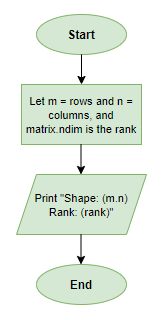

#### 2. **Square Matrices**

In [ ]:
def mat_desc(matrix):
  is_square = True if matrix.shape[0] == matrix.shape[1] else False
  print (f'Matrix:\n{matrix}\n\nShape:\t{matrix.shape}\nRank:\t{matrix.ndim}\nIs Square: {is_square}\n')

In [ ]:
square_mat = np.array([
    [9,8,7],
    [6,5,4],
    [3,2,1],                  
])

non_square_mat = np.array([
   [3,9,5,-1],
   [1,0,-2,6],
   [-8,4,3,-5],
])
mat_desc(square_mat)
mat_desc(non_square_mat)

Matrix:
[[9 8 7]
 [6 5 4]
 [3 2 1]]

Shape:	(3, 3)
Rank:	2
Is Square: True

Matrix:
[[ 3  9  5 -1]
 [ 1  0 -2  6]
 [-8  4  3 -5]]

Shape:	(3, 4)
Rank:	2
Is Square: False



#### **FLOWCHART**
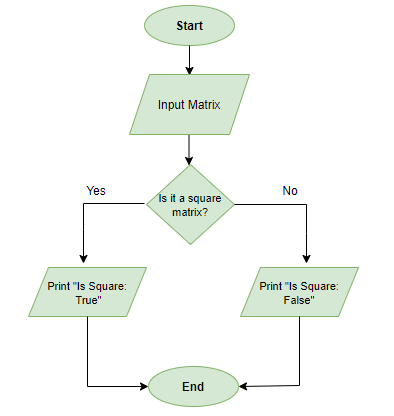

#### 3. **Empty Matrix**

In [ ]:
def mat_desc(matrix):
  if matrix.size > 0:
    is_square = True if matrix.shape[0] == matrix.shape[1] else False
    print (f'Matrix:\n{matrix}\n\nShape:\t{matrix.shape}\nRank:\t{matrix.ndim}\nIs Square: {is_square}\n')
  else:
    print('Matrix is Null')

In [ ]:
null_mat = np.array([])
mat_desc(null_mat)

Matrix is Null


#### **FLOWCHART**
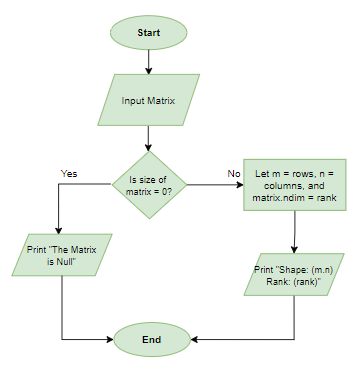

#### 4. **Identity, Ones, and Zeros Matrix**

##### **Zeros Matrix**

In [ ]:
zero_mat_row = np.zeros((4,5))
zero_mat_sqr = np.zeros((4,4))
zero_mat_rct = np.zeros((5,8))

print(f'Zero Row Matrix: \n{zero_mat_row}')
print(f'Zero Square Matrix: \n{zero_mat_sqr}')
print(f'Zero Rectangular Matrix: \n{zero_mat_rct}')

Zero Row Matrix: 
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Zero Square Matrix: 
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Zero Rectangular Matrix: 
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


#### **FLOWCHART**
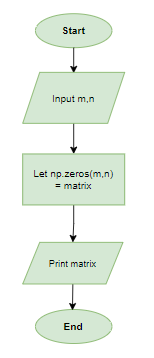

##### **Ones Matrix**

In [ ]:
ones_mat_row = np.ones((4,5))
ones_mat_sqr = np.ones((4,4))
ones_mat_rct = np.ones((5,8))


print(f'Ones Row Matrix: \n{ones_mat_row}')
print(f'Ones square Matrix: \n{ones_mat_sqr}')
print(f'Ones Rectangular Matrix: \n{ones_mat_rct}')

Ones Row Matrix: 
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
Ones square Matrix: 
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
Ones Rectangular Matrix: 
[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


#### **FLOWCHART**
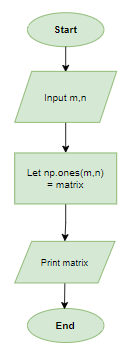

##### **Identity Matrix**

In [ ]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
np.identity(6)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

#### **FLOWCHART**
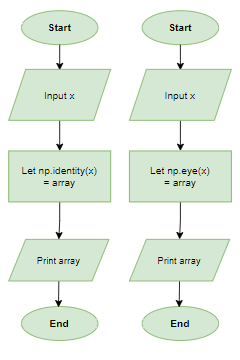

### ***TASK 2***

Create a function named `mat_operations()` that takes in two matrices a input parameters it should:<br>
 1. Determines if the matrices are viable for operation and returns your own error message if they are not viable.
 2. Returns the sum of the matrices.
 3. Returns the difference of the matrices.
 4. Returns the element-wise multiplication of the matrices.
 5. Returns the element-wise division of the matrices.

Use sample matrices in which their shapes are not lower than $(3,3)$.
In your methodology, create a flowchart discuss the functions and methods you have done. Present your results in the results section showing the description of each matrix you have declared.

In [ ]:
def mat_operations(matrix):
    print(f'Matrix:\n{matrix}\n\nShape:\t{matrix.shape}\nRank:\t{matrix.ndim}\n')

####1. **Determines if the matrices are viable for operation and returns your own error message if they are not viable.**


*   Yes the matrices are viable.




####2. **Addition**

In [ ]:
A = np.array([
   [7,-2,1],
   [8,3,6], 
   [5,5,5],
   [6,-4,0] 
])
B = np.array([
   [-3,7,3],
   [6,2,1],
   [4,4,9],
   [-2,9,5]   
])
A + B

array([[ 4,  5,  4],
       [14,  5,  7],
       [ 9,  9, 14],
       [ 4,  5,  5]])

In [ ]:
5+A

array([[12,  3,  6],
       [13,  8, 11],
       [10, 10, 10],
       [11,  1,  5]])

In [ ]:
2+B

array([[-1,  9,  5],
       [ 8,  4,  3],
       [ 6,  6, 11],
       [ 0, 11,  7]])

#### **FLOWCHART**
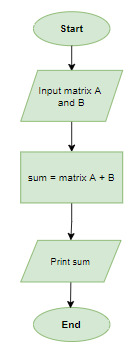

####3. **Subtraction**





In [ ]:
A-B

array([[ 10,  -9,  -2],
       [  2,   1,   5],
       [  1,   1,  -4],
       [  8, -13,  -5]])

In [ ]:
4-A

array([[-3,  6,  3],
       [-4,  1, -2],
       [-1, -1, -1],
       [-2,  8,  4]])

In [ ]:
4-B

array([[ 7, -3,  1],
       [-2,  2,  3],
       [ 0,  0, -5],
       [ 6, -5, -1]])

#### **FLOWCHART**
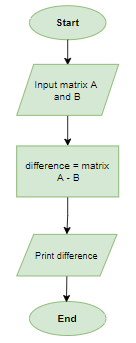

####4. **Element-Wise Multiplication**

In [ ]:
A*B
np.multiply(A,B)

array([[-21, -14,   3],
       [ 48,   6,   6],
       [ 20,  20,  45],
       [-12, -36,   0]])

In [ ]:
3*A

array([[ 21,  -6,   3],
       [ 24,   9,  18],
       [ 15,  15,  15],
       [ 18, -12,   0]])

In [ ]:
8*B

array([[-24,  56,  24],
       [ 48,  16,   8],
       [ 32,  32,  72],
       [-16,  72,  40]])

#### **FLOWCHART**
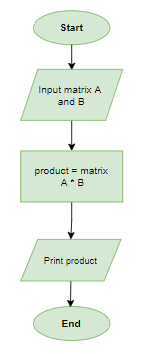

####5. **Element-Wise Division**

In [ ]:
A/B

array([[-2.33333333, -0.28571429,  0.33333333],
       [ 1.33333333,  1.5       ,  6.        ],
       [ 1.25      ,  1.25      ,  0.55555556],
       [-3.        , -0.44444444,  0.        ]])

In [ ]:
alpha=12**-12
A/(alpha+B)

array([[-2.33333333, -0.28571429,  0.33333333],
       [ 1.33333333,  1.5       ,  6.        ],
       [ 1.25      ,  1.25      ,  0.55555556],
       [-3.        , -0.44444444,  0.        ]])

#### **FLOWCHART**
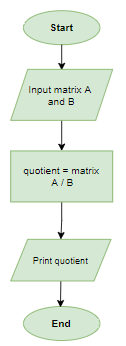

## ***Conclusion***

Numbers are everywhere and seeing too many of these numbers in the same place can often be confusing or irritating. But, it's a good thing that there's now what we call "matrices". Matrices are an array of numbers that are arranged in rows and columns. Since we've already knew how to insert codes and texts in our program, we've properly written a proper program about matrices and the functions to use to make it work. We learned here that there are different types of matrices like the zeros, ones, null, diagonal, identity, and etc. And we also knew that we can also do basic operations between two matrices such as addition, subtraction, multiplication and division. For such a complex topic like matrices which uses many numbers, this matrices can actually help us in a number of things such as helping us represent a large number of data or mathematical equations. It also provides us with quicker solving of more complex calculations which are mostly used in Statistics and in Chemistry. These applications of matrices will surely help us in solving complex computations that will benefit all of us in our future studies. 